In [23]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *
from idea import dynamic_IDEA

EXPERIMENT_ID = 7
TRIAL_ID = 0

W tym eksperymencie testowałem prosty labirynt.

In [24]:
%%time
random_state(f"rng_states/experiment{EXPERIMENT_ID}.npy")

S = [0.7] * 70
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 1

rectangle_lists = [[
    ((-2, -2), (5, -1)), ((-3, -2), (-2, 8)), ((-3, 8), (6, 9)), ((5, -2), (6, 8)),
    ((-2, 3), (4, 4)), ((3, 4), (4, 7))
]]
targets = [(2, 5)]
objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangle_lists[0])

n = 1000
alpha_inf = 0.9
n_immigrants = 0
eta_c = 3.
eta_m = 15.
p_c = 0.9
p_m = 0.05
num_iterations_init = 400
num_iterations = 160

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)
TRIAL_ID = 1
np.savez(f"/tmp/histories/experiment{EXPERIMENT_ID}_{TRIAL_ID}", populations=population_hist, scores=score_hist)

t=0
Iteration 0, #feasible: 5, best: [10.39739398], #infeasible: 995, best: [1.31920737e-03 4.00000000e+00]


/home/i291318/Dynamic-inverse-kinematics/simulation.py:34: RuntimeWarning: divide by zero encountered in true_divide
  t = _vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:35: RuntimeWarning: divide by zero encountered in true_divide
  u = _vector_product(x2 - x1, d1) / rs


Iteration 20, #feasible: 100, best: [4.80926116], #infeasible: 900, best: [6.13104166e-04 1.00000000e+00]
Iteration 40, #feasible: 100, best: [4.80926116], #infeasible: 900, best: [6.13104166e-04 1.00000000e+00]
Iteration 60, #feasible: 100, best: [4.80926116], #infeasible: 900, best: [8.07944134e-05 1.00000000e+00]
Iteration 80, #feasible: 100, best: [4.59283348], #infeasible: 900, best: [8.07944134e-05 1.00000000e+00]
Iteration 100, #feasible: 100, best: [4.13773025], #infeasible: 900, best: [8.07944134e-05 1.00000000e+00]
Iteration 120, #feasible: 100, best: [4.13773025], #infeasible: 900, best: [8.07944134e-05 1.00000000e+00]
Iteration 140, #feasible: 100, best: [4.13773025], #infeasible: 900, best: [8.07944134e-05 1.00000000e+00]
Iteration 160, #feasible: 100, best: [4.13773025], #infeasible: 900, best: [8.07944134e-05 1.00000000e+00]
Iteration 180, #feasible: 100, best: [4.13773025], #infeasible: 900, best: [8.07944134e-05 1.00000000e+00]
Iteration 200, #feasible: 100, best: [4.1

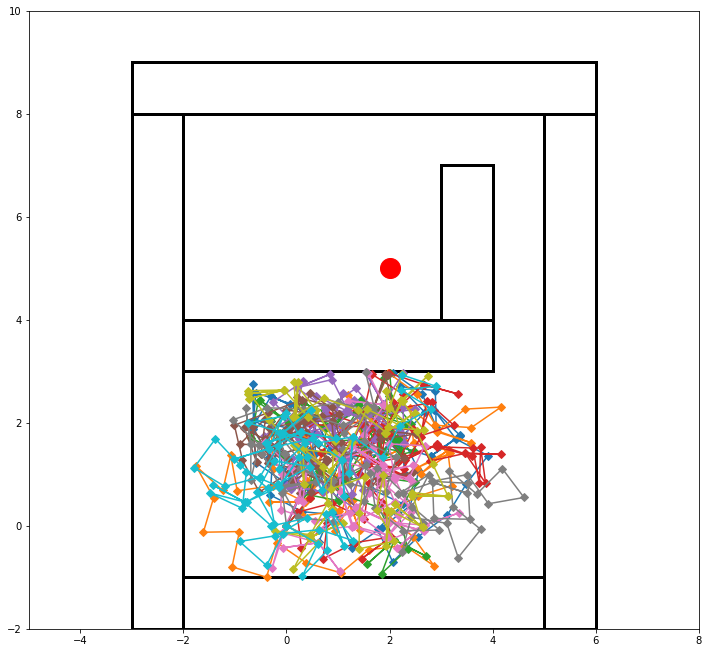

In [25]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    best = np.argsort(scores[-1, mask, 0])[:10]
    feasible_populations.append(feasible_population[best])
    
draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=1, ncols=1, figsize=(12, 12), xlim=(-5, 8), ylim=(-2, 10), squeeze=False)

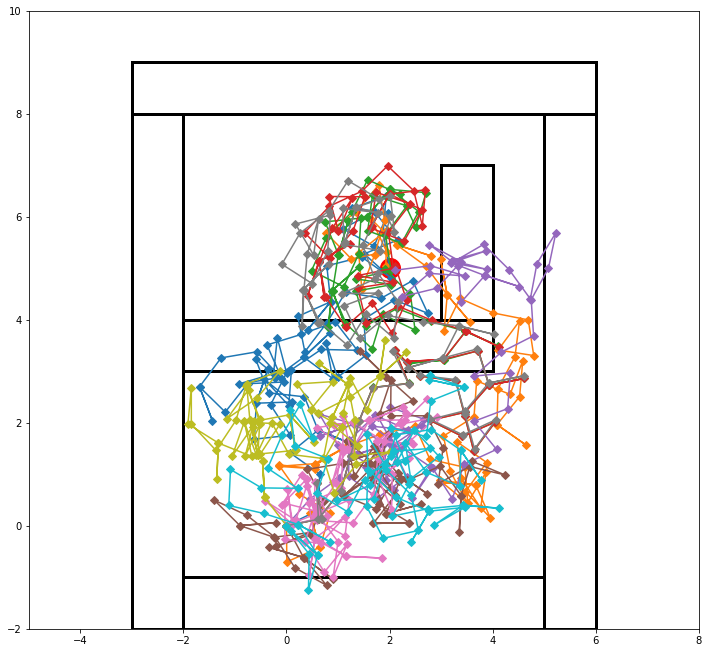

In [26]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population[::sum(~mask) // 10])
    
draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=1, ncols=1, figsize=(12, 12), xlim=(-5, 8), ylim=(-2, 10), squeeze=False)

In [4]:
%%time
random_state(f"rng_states/experiment{EXPERIMENT_ID}.npy")

S = [0.5] * 40
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 1

rectangle_lists = [[
    ((-2, -2), (5, -1)), ((-3, -2), (-2, 8)), ((-3, 8), (6, 9)), ((5, -2), (6, 8)),
    ((-2, 3), (4, 4))#, ((3, 4), (4, 6))
]]
targets = [(2, 5)]
objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangle_lists[0])

n = 800
alpha_inf = 0.8
n_immigrants = 0
eta_c = 5.
eta_m = 20.
p_c = 0.9
p_m = 0.05
num_iterations_init = 100
num_iterations = 160

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)
TRIAL_ID = 2
np.savez(f"/tmp/histories/experiment{EXPERIMENT_ID}_{TRIAL_ID}", populations=population_hist, scores=score_hist)

t=0
Iteration 0, #feasible: 160, best: [4.29484183], #infeasible: 640, best: [0.01857331 1.        ]
Iteration 20, #feasible: 160, best: [0.65249043], #infeasible: 640, best: [0.0018923 1.       ]
Iteration 40, #feasible: 160, best: [0.0014715], #infeasible: 640, best: [3.47274993e-04 1.00000000e+00]
Iteration 60, #feasible: 160, best: [0.00062644], #infeasible: 640, best: [1.03102456e-04 1.00000000e+00]
Iteration 80, #feasible: 160, best: [0.00012069], #infeasible: 640, best: [1.66348117e-05 1.00000000e+00]
Iteration 99, #feasible: 160, best: [5.64715982e-05], #infeasible: 640, best: [1.0665387e-05 1.0000000e+00]
CPU times: user 39.1 s, sys: 1.06 s, total: 40.1 s
Wall time: 40.1 s


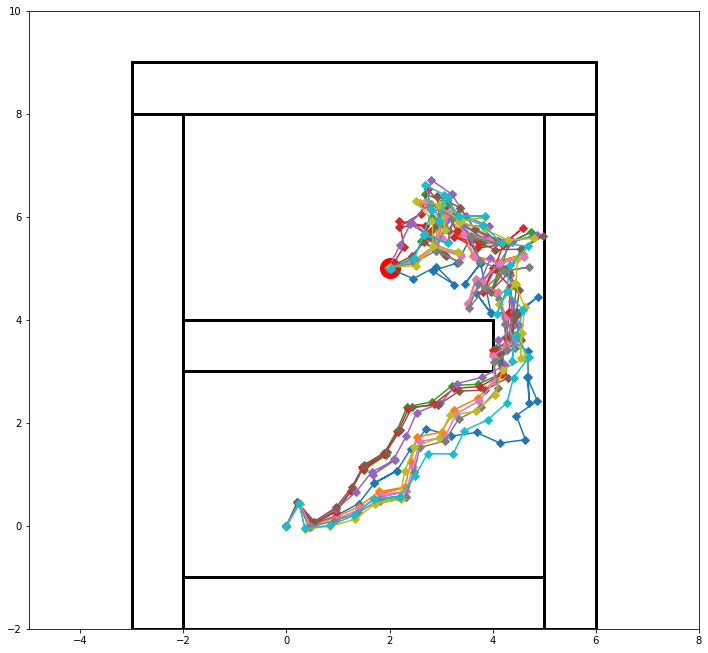

In [5]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    best = np.argsort(scores[-1, mask, 0])[:10]
    feasible_populations.append(feasible_population[best])
    
draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=1, ncols=1, figsize=(12, 12), xlim=(-5, 8), ylim=(-2, 10), squeeze=False)

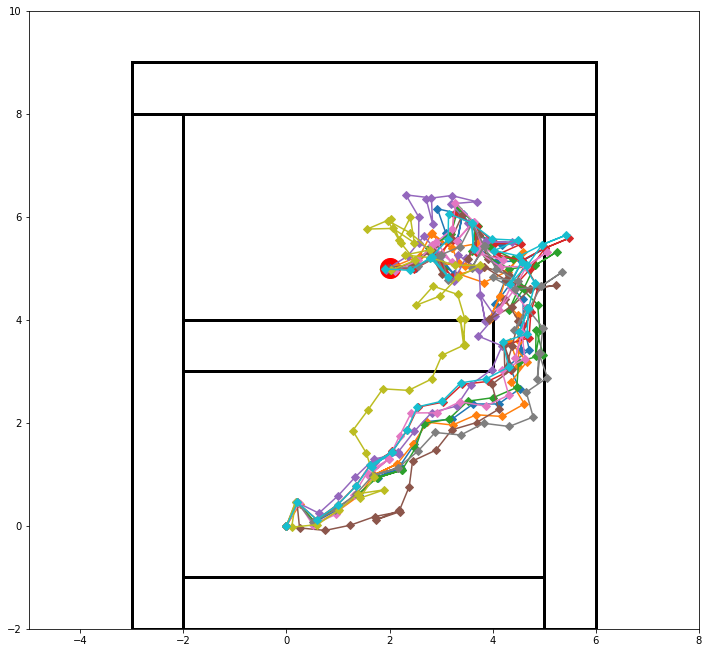

In [6]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population[::sum(~mask) // 10])
    
draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=1, ncols=1, figsize=(12, 12), xlim=(-5, 8), ylim=(-2, 10), squeeze=False)